In [91]:
import tensorflow as tf
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import HDF5Matrix 
from keras.layers import Conv2D,MaxPool2D,Dropout,BatchNormalization,Dense,MaxPool1D,ZeroPadding2D,Flatten
from keras.models import Sequential
from keras import backend as K
K.set_image_dim_ordering('tf')
%matplotlib inline

In [36]:
#f= h5py.File('Train/food_c101_n1000_r384x384x3.h5','r')

In [3]:
xtrain=HDF5Matrix('Train/food_c101_n10099_r32x32x1.h5','images')
ytrain=HDF5Matrix('Train/food_c101_n10099_r32x32x1.h5','category')

In [4]:
print ('xtrain shape is: ',xtrain.shape,', ytrain shape is: ',ytrain.shape)

xtrain shape is:  (10099, 32, 32, 1) , ytrain shape is:  (10099, 101)


In [152]:
im_train=h5py.File('Train/food_c101_n10099_r32x32x1.h5','r')

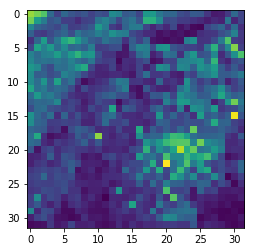

In [155]:
plt.imshow(im_train['images'][7][:,:,0],cmap = 'gray')

In [6]:
#xtrain=np.asarray(xtrain,dtype='float32')

In [7]:
#ytrain=np.asarray(ytrain,dtype='float32')

In [52]:
xtest=HDF5Matrix('Test/food_test_c101_n1000_r32x32x1.h5','images')
ytest=HDF5Matrix('Test/food_test_c101_n1000_r32x32x1.h5','category')

In [53]:
print ('xtest shape is: ',xtest.shape,', ytest shape is: ',ytest.shape)

xtest shape is:  (1000, 32, 32, 1) , ytest shape is:  (1000, 101)


In [10]:
#xtest=np.asarray(xtest,dtype='float32')
#ytest=np.asarray(ytest,dtype='float32')

In [11]:
category_type=HDF5Matrix('Test/food_test_c101_n1000_r32x32x1.h5','category_names')

scale the data  

In [10]:
xtrain_scaled=xtrain/255
xtest_scaled=xtest/255

# Network params

In [11]:
n_channel=1
n_width=32
n_heght=32
n_output=101

In [68]:
n_cov1_filter=32
n_cov2_filter=64
n_cov3_filter=64

n_kernel_1=(5,5)
n_kernel_2=(4,4)
n_kernel_3=(3,3)

drop_out_1=0.4
drop_out_2=0.6

n_dense_1=256

img_rows=xtrain.shape[1]
img_cols=xtrain.shape[2]
channel=xtrain.shape[3]

CNN Layers

In [75]:
model=Sequential()



model.add(ZeroPadding2D((1, 1), input_shape=(img_rows, img_cols, channel)))
model.add(Conv2D(n_cov1_filter,n_kernel_1,strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(n_cov1_filter,n_kernel_1,strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(drop_out_1))

model.add(Conv2D(n_cov2_filter,n_kernel_2,strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(n_cov2_filter,n_kernel_2,strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(drop_out_2))

model.add(Conv2D(n_cov3_filter,n_kernel_3,strides=(2,2),padding='same',activation='relu'))
model.add(Conv2D(n_cov3_filter,n_kernel_3,strides=(1,1),padding='same',activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(drop_out_2))

model.add(Flatten())

model.add(Dense(n_dense_1,activation='relu'))
model.add(Dense(n_dense_1,activation='relu'))

model.add(Dense(101,activation='softmax'))


In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_16 (ZeroPaddi (None, 34, 34, 1)         0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 34, 34, 32)        320       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 17, 17, 64)        18496     
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 17, 17, 64)        36928     
__________

In [78]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [79]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
loss_history={}

In [81]:
model.fit(xtrain,ytrain,batch_size=256,epochs=10,validation_data=(xtest,ytest),shuffle='batch')

Train on 10099 samples, validate on 1000 samples
Epoch 1/10
10099/10099 [==============================] - 103s 10ms/step - loss: 4.6167 - acc: 0.0084 - val_loss: 4.6136 - val_acc: 0.0070
Epoch 2/10
10099/10099 [==============================] - 101s 10ms/step - loss: 4.6142 - acc: 0.0103 - val_loss: 4.6083 - val_acc: 0.0140
Epoch 3/10
10099/10099 [==============================] - 125s 12ms/step - loss: 4.6146 - acc: 0.0112 - val_loss: 4.6050 - val_acc: 0.0100
Epoch 4/10
10099/10099 [==============================] - 119s 12ms/step - loss: 4.6118 - acc: 0.0106 - val_loss: 4.6018 - val_acc: 0.0140
Epoch 5/10
10099/10099 [==============================] - 112s 11ms/step - loss: 4.6108 - acc: 0.0123 - val_loss: 4.6013 - val_acc: 0.0130
Epoch 6/10
10099/10099 [==============================] - 123s 12ms/step - loss: 4.6127 - acc: 0.0125 - val_loss: 4.6011 - val_acc: 0.0090
Epoch 7/10
10099/10099 [==============================] - 132s 13ms/step - loss: 4.6152 - acc: 0.0127 - val_loss: 4.5

In [93]:
image_test=h5py.File('Test/food_test_c101_n1000_r32x32x1.h5','r')
label_test=h5py.File('Test/food_test_c101_n1000_r32x32x1.h5','r')

In [99]:
im_images=image_test['images'][0:16]
im_cate=label_test['category'][0:16]

In [123]:
im_images[0][:,:,0]

array([[-0.80314961, -0.78740157, -0.7480315 , ...,  0.77165354,
         0.60629921,  0.61417323],
       [-0.75590551, -0.74015748, -0.74015748, ...,  0.7480315 ,
         0.68503937,  0.7007874 ],
       [-0.76377953, -0.7007874 , -0.77165354, ...,  0.76377953,
         0.72440945,  0.75590551],
       ..., 
       [-0.35433071, -0.53543307, -0.46456693, ..., -0.5511811 ,
        -0.58267717, -0.59055118],
       [-0.34645669, -0.31496063, -0.51968504, ..., -0.56692913,
        -0.61417323, -0.71653543],
       [-0.33858268, -0.4015748 , -0.51181102, ..., -0.48818898,
        -0.58267717, -0.56692913]])

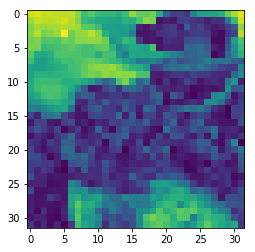

In [133]:
plt.imshow(im_images[1][:,:,0])

In [149]:
cat_name=label_test['category_names']

In [131]:
pred=model.predict(im_images)

In [136]:
pred=np.argmax(pred,axis=1)

In [139]:
pred[7]

65

In [151]:
#actual label
cat_name[np.argmax(im_cate[7])]

b'beet_salad'

In [150]:
#predicted
cat_name[pred[7]]

b'mussels'

<function matplotlib.pyplot.show>

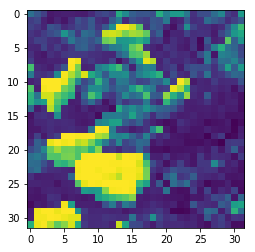

In [153]:
plt.imshow(im_images[7][:,:,0])
plt.show